## Implementing Locally Linear Embedding

Implimenting a locally linear embedding (LLE) on the swiss roll dataset. The effects of neighbourhood size and noise on the quality of the embedding will be displayed.

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import sklearn,sklearn.datasets
%matplotlib inline

The following code plots the swiss roll dataset with `N=1000` data points and a noise parameter of `0.25`.

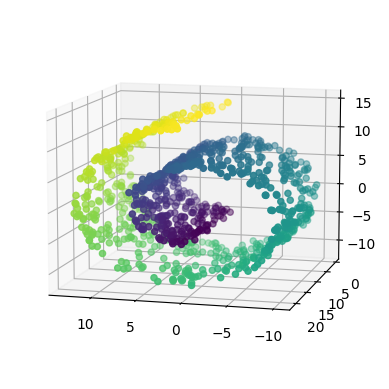

In [10]:
X,T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.25)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10., azim=105)
ax.scatter(X[:,0],X[:,1],X[:,2],c=T)
plt.show()

Although the dataset is in three dimensions, the points follow a two-dimensional low-dimensional structure. The goal of embedding algorithms is to extract this underlying structure, in this case, unrolling the swiss roll into a two-dimensional Euclidean space.

The following is a simple implementation of LLE. In case k>d i.e. the size of the neighbourhood is larger than the number of dimensions of the input space, it is necessary to regularize the matrix C.

In [3]:
def LLE(X,k):
    N = len(X)
    W = np.zeros([N,N])
    
    for i in range(N):
        x = X[i]

        dists = ((x - X)**2).sum(axis=1)**.5
        dists[i] = float('inf')

        ind = dists < sorted(dists)[k]
        diff = x - X[ind]
        C = np.dot(diff, diff.T)
        C = C  + 0.05*np.identity(k)
        w = np.linalg.solve(C, np.ones(k))

        w = w / w.sum()

        W[i,ind] = w
    
    M = np.identity(N) - W - W.T + np.dot(W.T,W)
    E = np.linalg.svd(M)[0][:,-3:-1]
    
    return E

Testing the algorithm on different parameters...

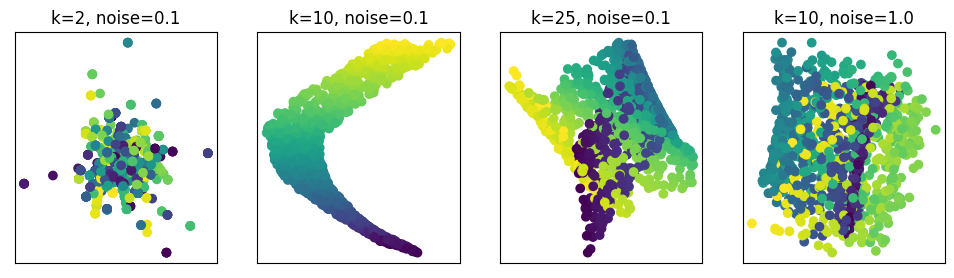

In [4]:
f = plt.figure(figsize=(12,3))
for t,(k,noise) in enumerate([(2,0.1),(10,0.1),(25,0.1),(10,1)]):
    X,T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=noise)
    embedding = LLE(X,k=k)
    ax = f.add_subplot(1,4,t+1)
    ax.set_title('k=%d, noise=%.1f'%(k,noise))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(embedding[:,0],embedding[:,1],c=T)

It can be observed that the parameter `k` must be carefully tuned to have sufficiently many neighbors for stability but also not too many. We can further observe that LLE works well as long as the noise in the data remains low enough.